<a href="https://colab.research.google.com/github/nikkoDuBois/ab_testing_student/blob/main/Task_2_(credit_card).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [19]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
# нулевых значений нет
df.isnull().sum().max()

0

In [13]:
print('Не жулики', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% от всех данных')
print('Жулики', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% от всех данных')

Не жулики 99.83 % от всех данных
Жулики 0.17 % от всех данных


In [21]:
df_delete_dupli = df.drop_duplicates()
print(len(df) - len(df_delete_dupli),"дубликатов до удаления")

1081 дубликатов до удаления


Данные плохо сбалансированны так как большее количество транзакций не связаны с жульничеством (жуликов лишь 0.17%).

In [18]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


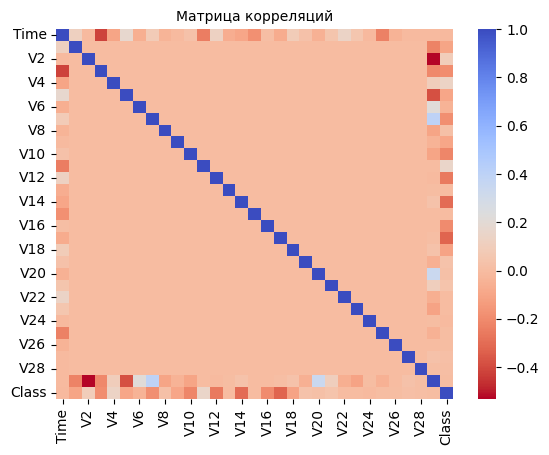

In [25]:
sns.heatmap(df.corr(), cmap='coolwarm_r')
plt.title("Матрица корреляций", fontsize=10)
plt.show()

V1-V28 имеют некоторую линейную зависимость с Time и Amount,

а вот Class с Time и Amount нелинейно зависимы.


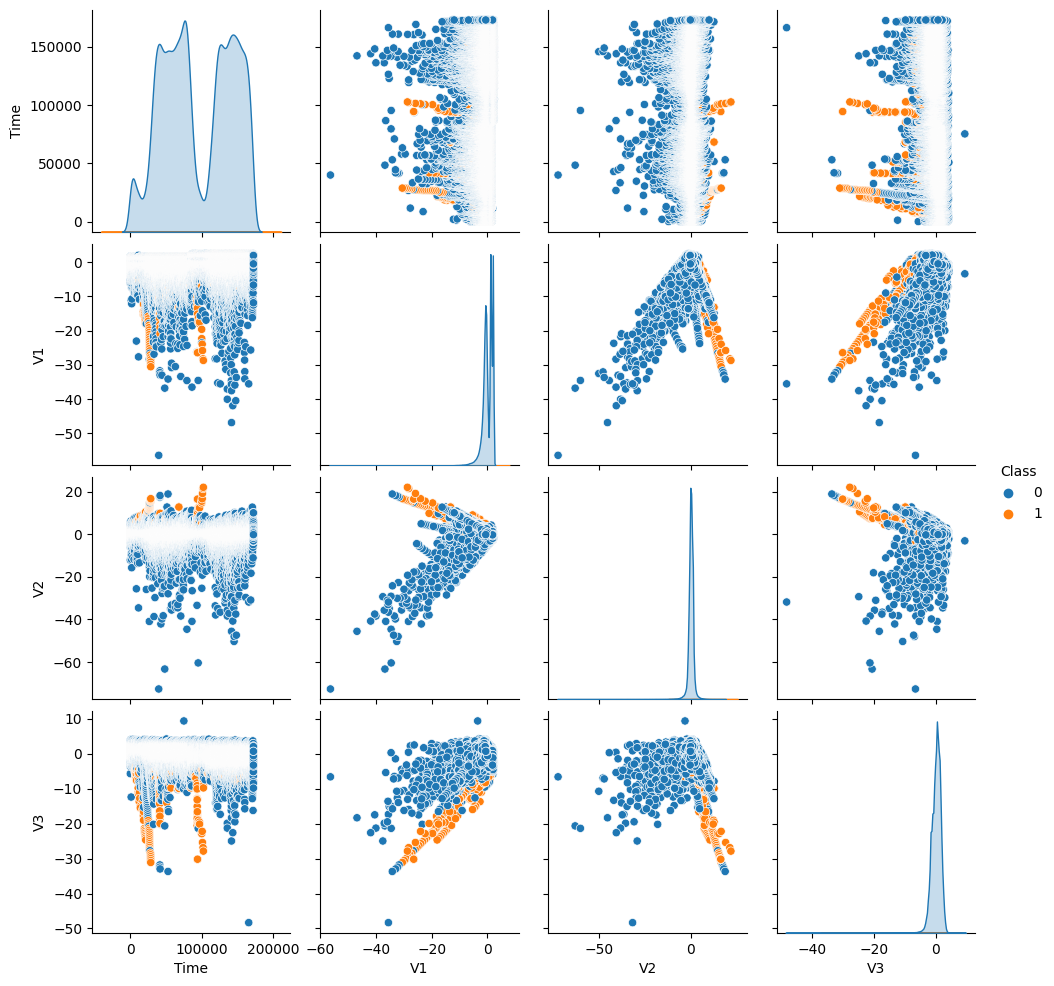

In [29]:
# строим pairplot лишь для некоторых параметров, чтобы оно успело посчитать до зачета...
selected_features = ['Time', 'V1', 'V2', 'V3']
data_subset = df[selected_features + ['Class']]
sns.pairplot(data_subset, hue='Class', diag_kind='kde')
plt.show()

Далее нужно разделить наши данные на тестовую и тренировочную части

In [35]:
from sklearn.model_selection import train_test_split
X = df.drop(['Class'], axis=1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

print(f"В тренировочной части жуличных операций {round(y_train.value_counts()[1] / y_train.shape[0] * 100, 2)}%")
print(f"В тестовой выборке жуличных операций {round(y_test.value_counts()[1] / y_test.shape[0] * 100, 2)}%")

В тренировочной части жуличных операций 0.17%
В тестовой выборке жуличных операций 0.17%


In [38]:
from sklearn.preprocessing import StandardScaler
standarts = StandardScaler()
standarts.fit(X_train)

X_train_standarts = pd.DataFrame(data=standarts.transform(X_train), columns=standarts.get_feature_names_out())
X_test_standarts = pd.DataFrame(data=standarts.transform(X_test), columns=standarts.get_feature_names_out())

Сперва будем использовать Логическую регрессию, так как она является базовым алгоритмом машинного обучения и поможет в нашем случае для несбалансированных данных



In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  precision_score, recall_score, precision_recall_curve, confusion_matrix, PrecisionRecallDisplay
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train_standarts, y_train)
y_pred = lr.predict(X_test_standarts)

Построим матрицу ошибок


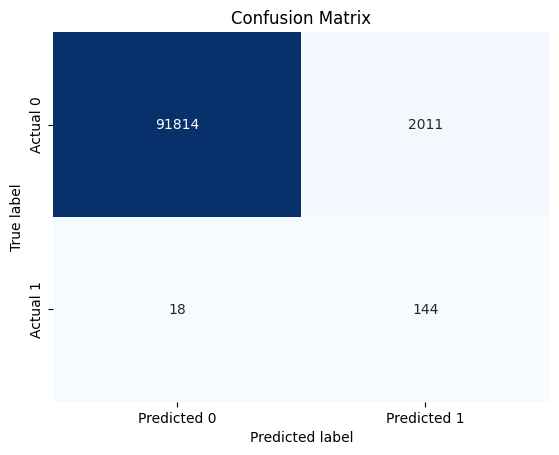

In [45]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [49]:
# recall норм но
# получается наша модель отобрала лишь 7% значений из всех значений класса 1
precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.06682134570765662, 0.8888888888888888)

Чтобы получить результаты получше будет использовать нелинейные модели например Случайный лес:

In [50]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop(['Class'], axis = 1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
standarts = StandardScaler()
standarts.fit(X_train)

X_train_standarts = pd.DataFrame(data=standarts.transform(X_train), columns=standarts.get_feature_names_out())
X_test_standarts = pd.DataFrame(data=standarts.transform(X_test), columns=standarts.get_feature_names_out())

RF = RandomForestClassifier(random_state=42, n_jobs=-1)
RF.fit(X_train_standarts, y_train);
y_pred = RF.predict(X_test_standarts)

precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.9572649572649573, 0.7567567567567568)

Теперь precision = 0.96, но recall снизился до 0.76

Выводы:

Были обучены две модели: модель Логистической регрессии и модель Случайного леса.

Используя модель логистической регрессии мы будет реже принимать обычные операции за мошеннические, но при этом мошеннических операций сможем определить слишком мало.

Модель случайного леса показала себя лучше в конкретном случае, так как смогла верно определить большую часть операций жуликов, хотя в целом сделала ошибок больше.